#Ejemplo 8: Introducción a RNN
---



**Objetivo y comprensión del problema**

https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.2-understanding-recurrent-neural-networks.ipynb





There is just one minor difference: SimpleRNN processes batches of sequences, like all other Keras layers, not just a single sequence like in our Numpy example. This means that it takes inputs of shape (batch_size, timesteps, input_features), rather than (timesteps, 
input_features).

Like all recurrent layers in Keras, SimpleRNN can be run in two different modes: it can return either the full sequences of successive outputs for each timestep (a 3D tensor of shape (batch_size, timesteps, output_features)), or it can return only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features)). These two modes are controlled by the return_sequences constructor argument. Let's take a look at an example:

In [1]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [0]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

In [0]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

## Paso 1: Gestión de los datos




Para la configuración de las bibliotecas a importar, se incluye Keras, scikit-learn y pandas.

https://towardsdatascience.com/deep-learning-4-embedding-layers-f9a02d55ac12

In [0]:
from keras.preprocessing import sequence

**1.1-Carga de datos**

En este caso, los datos están disponibles como un CSV que se carga desde un enlace online.

In [0]:
from keras.datasets import imdb

In [13]:
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')


Loading data...
25000 train sequences
25000 test sequences


**1.2-Visualización de los datos**

*   Se puede comprobar la forma que tienen nuestros datos. En este caso,  5572 instancias con 2 dimensiones (clasificación y texto).


In [14]:
print(input_train)


[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

**1.3-Codificar los datos**

Ver punto anterior.





In [15]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


**1.4-Seleccionar los datos**

En este caso, los datos ya están preparados y divididos apropiadamente.





## Paso 2: Arquitectura e implementación de nuestra red


1.   La entrada de nuestra red será una capa con 32 nodos de acuerdo a las dimensiones de nuestros datos.
2.   La función de activación o filtrado de esta primera capa será relu. Esta capa es "densa" o "totalmente conectada"
3.   La función de activación en la capa de salida será "sigmoid". 
4. La función de pérdida será  **mse**.
5. La función de optimización **adam**. 
6. Métricas: en este caso se selecciona sólo la precisión.



In [0]:
from keras.layers import Dense
network = Sequential()
network.add(Embedding(max_features, 32))
network.add(SimpleRNN(32))
network.add(Dense(1, activation='sigmoid'))




In [0]:
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


## Paso 3:  Entrenamiento



En este caso el entrenamiento se realiza utilizando el 80% de los datos y el 20% para el test (validation_split)

In [0]:
history = network.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

In [0]:
print("Precisión (entrenamiento):",history.history['acc'])

## Paso 4:  Test y Predicción

En este caso, se va a validar con el conjunto de test:


*   Se pasa como parámetro los datos de test.
*   Se obtiene el valor de la predicción como una probabilidad.
*   Se muestra la matriz de confusión y se calcula "a mano" la precisión de esta validación.



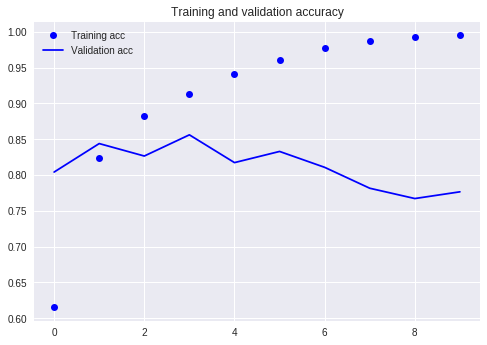

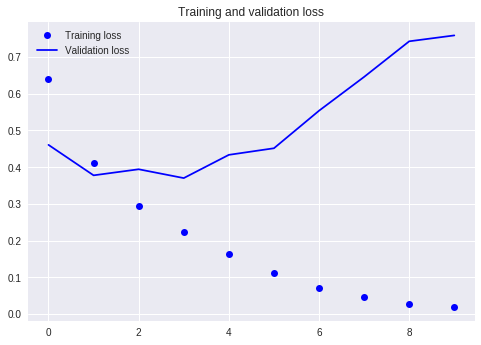

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As a reminder, in chapter 3, our very first naive approach to this very dataset got us to 88% test accuracy. Unfortunately, our small recurrent network doesn't perform very well at all compared to this baseline (only up to 85% validation accuracy). Part of the problem is that our inputs only consider the first 500 words rather the full sequences -- hence our RNN has access to less information than our earlier baseline model. The remainder of the problem is simply that SimpleRNN isn't very good at processing long sequences, like text. Other types of recurrent layers perform much better. Let's take a look at some more advanced layers.

#Paso 6: Guardar configuración del modelo

In [0]:
network.save('imdb_model.h5')

#Tareas

1.   Cambiar el tipo de la función de pérdida y ver cómo afecta al resultado.
2.   Cambiar la función de optimización y ver cómo afecta al resultado.
3.   Cambiar la toplogía de la red.